In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test', 'sample_submission.csv', 'train.csv', 'train']


# Introduction
In this short notebook I wanted to experiment with PCA and neural network implemented with Keras library.
Also I would like to ilustrate how PCA decomposition works on data from this dataset. Most important thing, I would like hopefully to get some feedback to improve this method or find completely different approach.

Thanks to other authors for publishing their notebooks, I reused some parts of the code when I was looking for fiding nice solutions for problems I had on a way. 

# let's first start analyzing the data how much classes we are dealing , data is imbalance or not 

In [31]:
train_df=pd.read_csv("../input/train.csv")

In [32]:
train_df.shape

(17500, 2)

In [33]:
train_df.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [34]:
import seaborn as sns 
import matplotlib.pyplot as plt

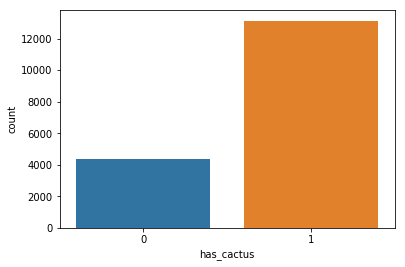

In [35]:
sns.countplot(train_df["has_cactus"])

# so again dealing with imbalance classifacition we have to use some dice loss or focal loss or in keras we have to use logits_v2 with categorical cross entropy 

In [36]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications import VGG16
from keras.optimizers import Adam

In [37]:
train_dir = "../input/train/train/"
test_dir = "../input/test/test/"

In [ ]:
# X_tr = []
# Y_tr = []
# imges = train_df['id'].values
# for img_id in tqdm_notebook(imges):
#     X_tr.append(cv2.imread(train_dir + img_id,0))    
#     Y_tr.append(train_df[train_df['id'] == img_id]['has_cactus'].values[0])  
# X_tr = np.asarray(X_tr)
# X_tr = X_tr.astype('float32')
# X_tr /= 255
# Y_tr = np.asarray(Y_tr)


In [ ]:
# X_tr=X_tr.reshape(-1,32,32,1)

In [ ]:
# Y_tr.shape

# First for applying PCA we need to convert rgb images to grayscale , same as well for test images we have to do 

Image has 32x32 pixels, so data has 1024 features. Now for computers such amount of data isn't that big, but there can be cases, when dimensional reduction can be important. It is better for further processing to have 625 features containing most of the data than 1000 features.

Before I use PCA to reduce dimensionality of the data I will standardize it using sklearn StandartScaler. It is fitted to train data, because I assume that I know nothing about test data. Both datasets are transformed. 

In [ ]:
# X_tr.shape

# so now we need pixel wise values after that only we can apply PCA to see that with less features can we get same accuracy

In [ ]:
# target=train_df["has_cactus"]

In [ ]:
# train_df=train_df.drop("has_cactus",axis=1)

In [ ]:
# import os,array
# import pandas as pd
# import time
# import dask as dd

# from PIL import Image
# def pixelconv(file_list,img_height,img_width,pixels):  
#     columnNames = list()

#     for i in range(pixels):
#         pixel = 'pixel'
#         pixel += str(i)
#         columnNames.append(pixel)


#     train_data = pd.DataFrame(columns = columnNames)
#     start_time = time.time()
#     for i in tqdm_notebook(file_list):
#         t = i
#         img_name = t
#         img = Image.open('../input/train/train/'+img_name)
#         rawData = img.load()
#         #print rawData
#         data = []
#         for y in range(img_height):
#             for x in range(img_width):
#                 data.append(rawData[x,y][0])
#         print (i)
#         k = 0
#         #print data
#         train_data.loc[i] = [data[k] for k in range(pixels)]
#     #print train_data.loc[0]

#     print ("Done pixel values conversion")
#     print  (time.time()-start_time)
#     print (train_data)
#     train_data.to_csv("train_converted_new.csv",index = False)
#     print ("Done data frame conversion")
#     print  (time.time()-start_time)
# pixelconv(train_df.id,32,32,1024) # pass pandas dataframe in which path of images only as column
#                                     # in return csv file will save in working directory 

In [ ]:
# new_data=pd.read_csv("../working/train_converted_new.csv")

In [ ]:
# new_data.head()

# so finally we have dataset of pixel values now we can apply PCA with pixeld data 

In [ ]:
# import numpy as np
# import pandas as pd

# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# from keras.models import Sequential
# from keras.utils import np_utils
# from keras.layers import Dense, Dropout, GaussianNoise, Conv1D
# from keras.preprocessing.image import ImageDataGenerator

# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

In [ ]:

# pca = PCA(n_components=500)
# pca.fit(new_data)

# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative explained variance')

In plot above we can see that cumulative explained variance is very high near 500 and then it increases very slowly. That means that data describing changes is mostly contained in i guess 625  components. We need to evaluate trade-offs before we choose number of components we use further. I choose 625 to check how it will work as it seems to have most of the data.

# so we come to know that with less number features we can explain the dataset 

In [ ]:
# NCOMPONENTS = 625

# pca = PCA(n_components=NCOMPONENTS)
# X_pca_train = pca.fit_transform(new_data)
# pca_std = np.std(X_pca_train)
# print(X_pca_train.shape)

In [ ]:
# inv_pca = pca.inverse_transform(X_pca_train)
# #inv_sc = scaler.inverse_transform(inv_pca)

In [ ]:
# X_pca_train_new=X_pca_train.reshape(X_pca_train.shape[0],25,25,1)

In [ ]:
# X_pca_train_new.shape

# Apply MLP With PCA

In [ ]:
# X_pca_train.shape ### this shape will be used in MLP

# Neural network with Keras

I implemened simple model of multilayer perceptron (MLP) neural network using Keras and experimented with it.

Using library is simple. First you need to create model instance and then add layers using models.add() method. First layer need to be set up for proper input dimension. Output layer needs to have proper output dimension and activation function. In between hidden layers can be added.

During compilation parameters of loss function, optimizer and metrics need to be set depanding on problem.

In [ ]:
# import keras
# model = Sequential()
# layers = 1
# units = 128

# model.add(Dense(units, input_dim=NCOMPONENTS, activation='relu'))
# model.add(GaussianNoise(pca_std))
# model.add(Dense(units, activation='relu'))
# model.add(GaussianNoise(pca_std))
# model.add(Dropout(0.1))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=1e-5), metrics=['acc'])
# history = model.fit(X_pca_train,target,
#           batch_size=32,
#           epochs=10,
#           verbose=1,
#           validation_split=0.15)

# #model.fit(X_pca_train, Y_train, epochs=100, batch_size=256, validation_split=0.15, verbose=2)

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# accuracy = history.history['acc']
# val_accuracy = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(len(accuracy))
# plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
# plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend()
# plt.figure()
# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()
# plt.show()

# Applied CNN with PCA

In [ ]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten
# from keras.layers import Conv2D, MaxPooling2D
# from keras.layers.normalization import BatchNormalization

# batch_size = 256
# num_classes = 1
# epochs = 200

# #input image dimensions
# img_rows, img_cols = 25, 25

# model = Sequential()
# model.add(Conv2D(64, kernel_size=(3, 3),
#                  activation='relu',
#                  input_shape=(25,25,1)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.1))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(Dropout(0.2))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(num_classes, activation='sigmoid'))

# model.compile(loss=keras.losses.binary_crossentropy,
#               optimizer=keras.optimizers.Adam(lr=1e-5),
#               metrics=['accuracy'])

In [ ]:
# history1 = model.fit(X_pca_train_new,target,
#           batch_size=batch_size,
#           epochs=200,
# #           verbose=1,
#           validation_split=0.15)


In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# accuracy = history1.history['acc']
# val_accuracy = history1.history['val_acc']
# loss = history1.history['loss']
# val_loss = history1.history['val_loss']
# epochs = range(len(accuracy))
# plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
# plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
# plt.title('CNN result Training and validation accuracy')
# plt.legend()
# plt.figure()
# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('cnn Training and validation loss')
# plt.legend()
# plt.show()

# so we have pca with MLP as well as with CNN

In [ ]:
# %%time
# X_tst = []
# Test_imgs = []
# for img_id in tqdm_notebook(os.listdir(test_dir)):
#     X_tst.append(cv2.imread(test_dir + img_id,0))     
#     Test_imgs.append(img_id)
# X_tst = np.asarray(X_tst)
# X_tst = X_tst.astype('float32')
# X_tst /= 255

# so now we will be again applyig PCA on test set and predict with cnn model let's how much accuracy we can bring 

In [ ]:
# X_tst.shape

In [ ]:
# X_tst=X_tst.reshape(-1,32,32,1)

In [ ]:
# test_path=[]
# for i in os.listdir(test_dir):
#     test_path.append(i)

In [ ]:
# test_dataframe=pd.DataFrame(data=test_path,columns=["id"])

In [ ]:
# test_dataframe.head()

In [ ]:
# import os,array
# import pandas as pd
# import time
# import dask as dd

# from PIL import Image
# def pixelconv(file_list,img_height,img_width,pixels):  
#     columnNames = list()

#     for i in range(pixels):
#         pixel = 'pixel'
#         pixel += str(i)
#         columnNames.append(pixel)


#     train_data = pd.DataFrame(columns = columnNames)
#     start_time = time.time()
#     for i in file_list:
#         t = i
#         img_name = t
#         img = Image.open('../input/test/test/'+img_name)
#         rawData = img.load()
#         #print rawData
#         data = []
#         for y in range(img_height):
#             for x in range(img_width):
#                 data.append(rawData[x,y][0])
#         print (i)
#         k = 0
#         #print data
#         train_data.loc[i] = [data[k] for k in range(pixels)]
#     #print train_data.loc[0]

#     print ("Done pixel values conversion")
#     print  (time.time()-start_time)
#     print (train_data)
#     train_data.to_csv("test_converted_new.csv",index = False)
#     print ("Done data frame conversion")
#     print  (time.time()-start_time)
# pixelconv(test_dataframe.id,32,32,1024) # pass pandas dataframe in which path of images only as column
#                                     # in return csv file will save in working directory 

In [ ]:
# new_test=pd.read_csv("../working/test_converted_new.csv")

In [ ]:
# X_tst=pca.transform(new_test)

In [ ]:
# X_tst.shape

In [ ]:
# X_tst=X_tst.reshape(-1,25,25,1)

In [ ]:
# X_tst.shape

# CNN with Focal Loss , hey man i should foucs tuff example to classify

The focal loss was proposed for dense object detection task early this year. It enables training highly accurate dense object detectors with an imbalance between foreground and background classes at 1:1000 scale. This tutorial will show you how to apply focal loss to train a multi-class classifier model given highly imbalanced datasets.

Background
Let's first take a look at other treatments for imbalanced datasets, and how focal loss comes to solve the issue.

In multi-class classification, a balanced dataset has target labels that are evenly distributed. If one class has overwhelmingly more samples than another, it can be seen as an imbalanced dataset. This imbalance causes two problems:

Training is inefficient as most samples are easy examples that contribute no useful learning signal;
The easy examples can overwhelm training and lead to degenerate models.
A common solution is to perform some form of hard negative mining that samples hard examples during training or more complex sampling/reweighing schemes.

For image classification specific, data augmentation techniques are also variable to create synthetic data for under-represented classes.

The focal loss is designed to address class imbalance by down-weighting inliers (easy examples) such that their contribution to the total loss is small even if their number is large. It focuses on training a sparse set of hard examples.



In [38]:
train_df["image_location"]=train_dir+train_df["id"]

In [39]:
train_df.head()

,id,has_cactus,image_location
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1,../input/train/train/0004be2cfeaba1c0361d39e2b...
1,000c8a36845c0208e833c79c1bffedd1.jpg,1,../input/train/train/000c8a36845c0208e833c79c1...
2,000d1e9a533f62e55c289303b072733d.jpg,1,../input/train/train/000d1e9a533f62e55c289303b...
3,0011485b40695e9138e92d0b3fb55128.jpg,1,../input/train/train/0011485b40695e9138e92d0b3...
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1,../input/train/train/0014d7a11e90b62848904c141...


In [40]:
import tensorflow as tf
from keras import backend as K

In [41]:
def binary_focal_loss(gamma=2., alpha=.25):
    """
    Binary form of focal loss.
      FL(p_t) = -alpha * (1 - p_t)**gamma * log(p_t)
      where p = sigmoid(x), p_t = p or 1 - p depending on if the label is 1 or 0, respectively.
    References:
        https://arxiv.org/pdf/1708.02002.pdf
    Usage:
     model.compile(loss=[binary_focal_loss(alpha=.25, gamma=2)], metrics=["accuracy"], optimizer=adam)
    """
    def binary_focal_loss_fixed(y_true, y_pred):
        """
        :param y_true: A tensor of the same shape as `y_pred`
        :param y_pred:  A tensor resulting from a sigmoid
        :return: Output tensor.
        """
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))

        epsilon = K.epsilon()
        # clip to prevent NaN's and Inf's
        pt_1 = K.clip(pt_1, epsilon, 1. - epsilon)
        pt_0 = K.clip(pt_0, epsilon, 1. - epsilon)

        return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) \
               -K.sum((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))

    return binary_focal_loss_fixed

# image augmentation we are using at runtime but to do that we need few things , i'm using a script to pass respective images in their respective label folder 

# so that script will work in smooth process , make unique set of labels folder first then image mapping we will using and pass every image in their respective folder 

In [42]:
train_df.head()

,id,has_cactus,image_location
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1,../input/train/train/0004be2cfeaba1c0361d39e2b...
1,000c8a36845c0208e833c79c1bffedd1.jpg,1,../input/train/train/000c8a36845c0208e833c79c1...
2,000d1e9a533f62e55c289303b072733d.jpg,1,../input/train/train/000d1e9a533f62e55c289303b...
3,0011485b40695e9138e92d0b3fb55128.jpg,1,../input/train/train/0011485b40695e9138e92d0b3...
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1,../input/train/train/0014d7a11e90b62848904c141...


In [43]:
#from console_progressbar import ProgressBar
import shutil
import tqdm
import os
filenames=list(train_df["image_location"].values)
labels=list(train_df["has_cactus"].values)
folders_to_be_created = np.unique(list(train_df['has_cactus'].values))
files=[]
path="../working/trainset/"
for i in folders_to_be_created:
    if not os.path.exists(path+str(i)):
        os.makedirs(path+str(i)) 
#pb = ProgressBar(total=100, prefix='Save valid data', suffix='', decimals=3, length=50, fill='=')
for f in tqdm_notebook(range(len(filenames))):
    
    current_image=filenames[f]
    current_label=labels[f]
    src_path=current_image
   
    dst_path =path+str(current_label) 
    
    try :
        shutil.copy(src_path, dst_path)
        #pb.print_progress_bar((f + 1) * 100 / 4000)
    except Exception as e :
        files.append(src_path)

# image augumentation begins

# we are using subset in imagedatagenerator therefore whatever augumentation we are applying will not get introduced in validation 

In [44]:
import keras
from keras_preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
train_datagen = ImageDataGenerator(
    rescale = 1./255,
#     preprocessing_function= preprocess_input,
    #shear_range=0.2,
    zoom_range=0.2,
    fill_mode = 'reflect',
    #cval = 1,
    rotation_range = 30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,validation_split=.20)

valid_datagen = ImageDataGenerator(rescale=1./255)#,preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    directory='../working/trainset/',
    target_size=(32, 32),
    batch_size=32,
    class_mode='binary',subset="training")

validation_generator = train_datagen.flow_from_directory(
    directory='../working/trainset/',
    target_size=(32,32),
    batch_size=32,
    class_mode='binary',subset="validation")

Found 14001 images belonging to 2 classes.
Found 3499 images belonging to 2 classes.


# Applying VGG-16 First 

In [ ]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications import VGG16
from keras.optimizers import Adam


In [ ]:
vgg16_net = VGG16(weights='imagenet', 
                  include_top=False, 
                  input_shape=(32, 32, 3))

In [ ]:
vgg16_net.trainable = False
vgg16_net.summary()

In [ ]:
model = Sequential()
model.add(vgg16_net)
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss=[binary_focal_loss(alpha=.25, gamma=2)], metrics=["accuracy"], optimizer=Adam(lr=1e-5))

In [ ]:
history=model.fit_generator(train_generator,
                    steps_per_epoch = 14001//32,
                    epochs=50,
                    validation_data = validation_generator,validation_steps=3499//32)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#plot of model epochs what has been happened within 100 epochs baseline with vgg16 training 135 million params
# freezing first layer
fig = plt.figure(figsize=(12,8))
plt.plot(history.history['acc'],'blue')
plt.plot(history.history['val_acc'],'orange')
plt.xticks(np.arange(0, 50, 1))
plt.yticks(np.arange(0,1,.1))
plt.rcParams['figure.figsize'] = (10, 10)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.grid(True)
plt.gray()
plt.legend(['train','validation'])
plt.show()
 
plt.figure(1)
plt.plot(history.history['loss'],'blue')
plt.plot(history.history['val_loss'],'orange')
plt.xticks(np.arange(0, 50, 1))
plt.rcParams['figure.figsize'] = (10, 10)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.grid(True)
plt.gray()
plt.legend(['train','validation'])
plt.show()

In [ ]:
%%time
X_tst = []
Test_imgs = []
for img_id in tqdm_notebook(os.listdir(test_dir)):
    X_tst.append(cv2.imread(test_dir + img_id))     
    Test_imgs.append(img_id)
X_tst = np.asarray(X_tst)
X_tst = X_tst.astype('float32')
X_tst /= 255

In [ ]:
# Prediction
test_predictions = model.predict(X_tst)


# due focal loss we are taking 0.5 as threshold , but let's see on scoreboard

In [ ]:
sub_df = pd.DataFrame(test_predictions, columns=['has_cactus'])
sub_df['has_cactus'] = sub_df['has_cactus'].apply(lambda x: 1 if x > 0.5 else 0)

In [ ]:
sub_df['id'] = ''
cols = sub_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
sub_df=sub_df[cols]


In [ ]:
for i, img in enumerate(Test_imgs):
    sub_df.set_value(i,'id',img)

In [ ]:
sub_df.head()

In [ ]:
sub_df.to_csv('submission_focal_loss_vgg-16.csv',index=False)

# Applying Resnet-50 and then after that we can compare results what we get from these models

In [ ]:
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array
from keras.optimizers import Adam

In [ ]:
base_model = ResNet50(weights='imagenet',include_top=False,input_shape=(32,32,3))

base_model.summary()

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
# # let's add a fully-connected layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
# # and a logistic layer -- let's say we have 200 classes
model.add(Dense(1, activation='sigmoid'))
model.compile(loss=binary_focal_loss(gamma=2,alpha=0.28), metrics=["accuracy"], optimizer=Adam(lr=1e-5))

In [ ]:
history1=model.fit_generator(train_generator,
                    steps_per_epoch = 14001//32,
                    epochs=85,
                    validation_data = validation_generator,validation_steps=3499//32)

In [ ]:
# Prediction
test_predictions = model.predict(X_tst)


In [ ]:
sub_df = pd.DataFrame(test_predictions, columns=['has_cactus'])
sub_df['has_cactus'] = sub_df['has_cactus'].apply(lambda x: 1 if x > 0.5 else 0)

In [ ]:
sub_df['id'] = ''
cols = sub_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
sub_df=sub_df[cols]


In [ ]:
for i, img in enumerate(Test_imgs):
    sub_df.set_value(i,'id',img)

In [ ]:
sub_df.head()

In [ ]:
sub_df.to_csv('submission_focal_loss_resnet_50.csv',index=False)

# AS we can see the effects of focal loss at early stages it need sometime to adjust itself even i have same focal loss method for categorical cross entropy to work on imbalance classification it will take some time about 20 epochs adjust it's loss on validation , so still we can see validation at 98.92 and training is 98.30

# Conclusion

After experiments with parameters of the used models I came to the result of 0.89+ accuracy on the part of the test set, but I am unable to improve it.

Because dataset is build with images of handwritten digits getting bigger train set could help. Maybe I need to change approach, ignore PCA decomposition at all and use ImageDataGenerator to generate more images or use convolution layers. 

If you know how above result can be (easily?) improved, please leave comment with suggestion. As data science newbie I would be grateful for any suggestions :)